# Статистика, DS-поток
## Практическое задание 6


**Правила:**

* Дедлайн **18 октября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  100 баллов
* Задача 2 &mdash;  70 баллов
* Задача 3 &mdash;  150 баллов
* Задача 4 &mdash;  50 баллов
* Задача 5 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задачи 1, 2, 4;
* *средне-высокая:* задача 3, 5.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

import scipy.stats as sps
import scipy
import plotly
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image
import plotly.offline as pof

sns.set(font_scale=1.5, palette='Set2')

______________
## Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine (файл `wine.data`) и загрузите их с помощью библиотеки pandas.

In [389]:
data = pd.read_csv('wine.data', names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 
              'Alcalinity of ash', 'Magnesium', 'Total phenols', 
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315', 'Proline'])
data

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315  Proline  
0               5.64  1.04         3.92     1065  
1               4.38  1.05         3.40     1050  
2               5.68  1.03         3.17     1185  
3               7.80  0.86         3.45     1480  
4               4.32  1.04         2.93      735  
..               ...   ...          ...      ...  
173             7.70  0.64         1.74      740  
174             7.30  0.70         1.56      750  
175            10.20  0.59         1.56      835  
176             9.30  0.60         1.62      840  
177             9.20  0.61         1.60      560  

[178 rows x 14 columns]

Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:** $$\widehat{a} = \frac{\sum\limits_{i=1}^{n} X_i}{n}$$ 
  $$\widehat{\Sigma} = \frac{\sum\limits_{i=1}^{n}(X_i - \widehat{a})(X_i - \widehat{a})^T}{n}$$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue" для всех сортов вина вместе.
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

In [390]:
columns = ['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']
df = data[columns].copy()

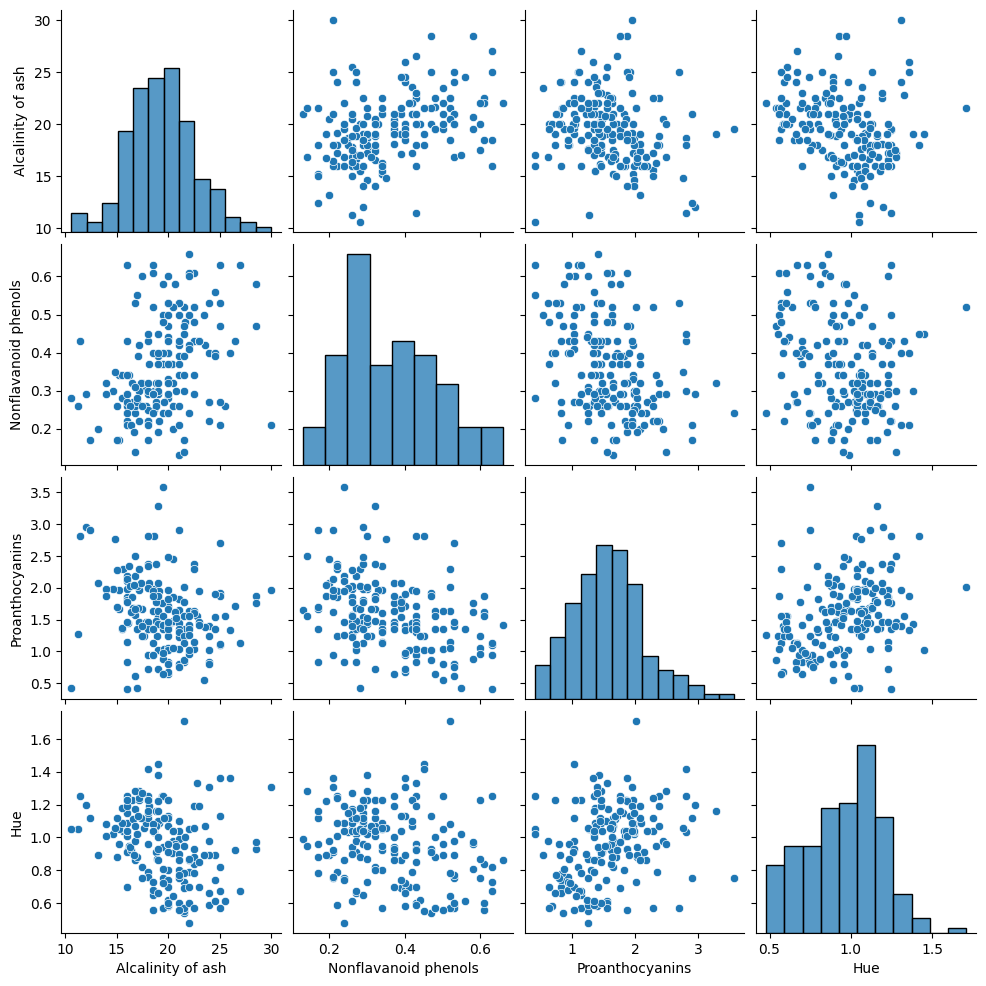

In [391]:
sns.pairplot(df);

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $a$ и матрицы ковариаций $\Sigma$ по выборке. Использование циклов наказуемо.

In [392]:
def mle_for_mean(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    '''
    
    return sample.mean(axis=0)

In [393]:
def mle_for_covariance_matrix(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    '''
    mle_a = mle_for_mean(sample)
    
    return ((sample - mle_a).T @ (sample - mle_a)) / sample.shape[0]

In [394]:
a = mle_for_mean(df.values)
sigma = mle_for_covariance_matrix(df.values)

Визуализируйте полученный результат. Для каждой пары признаков постройте информативный график, на котором будут:

1. Точки выборки.

2. Плотность нормального распределения с оцененными параметрами, которую изобразите в виде линий уровня.

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

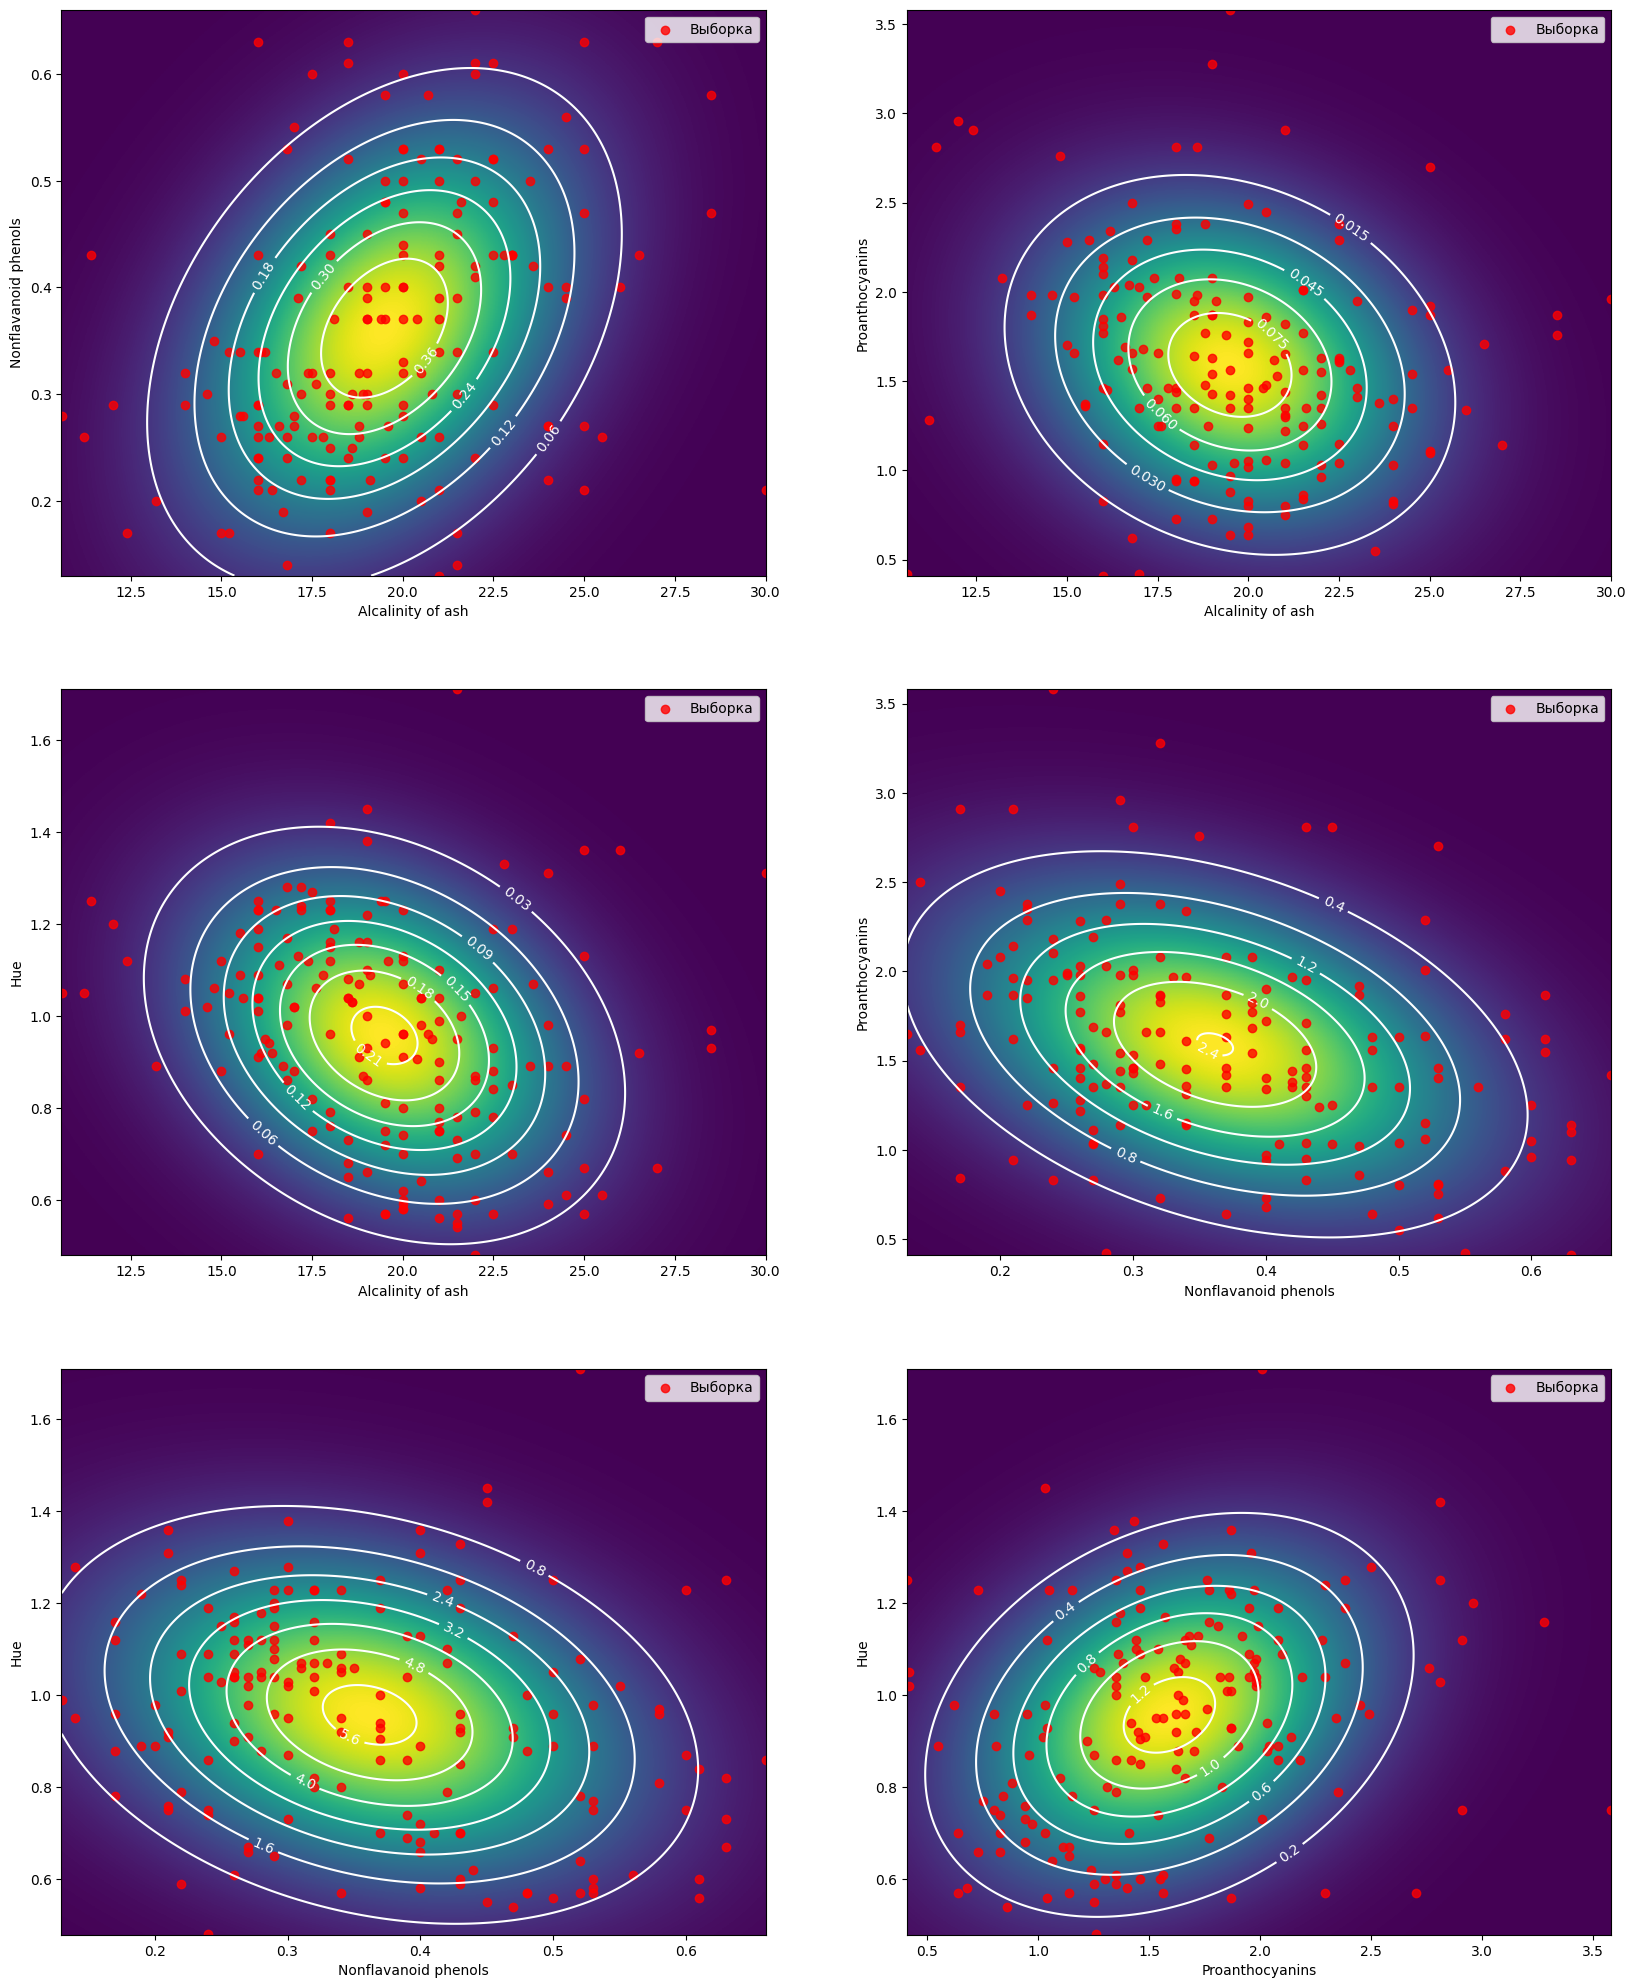

In [397]:
columns = ['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']
plt.figure(figsize=(20, 25))

k = 1
for i in range(len(columns)):
    for j in range(len(columns)):
        if i >= j:
            continue
        plt.subplot(3, 2, k)
        sample = multivariate_normal([a[i], a[j]], [[sigma[i][i], sigma[i][j]], [sigma[j][i], sigma[j][j]]])
        x = np.linspace(df[columns[i]].min(), df[columns[i]].max(), 1000)
        y = np.linspace(df[columns[j]].min(), df[columns[j]].max(), 1000)
        xy = np.meshgrid(x, y)
        plt.pcolormesh(xy[0], xy[1], sample.pdf(np.dstack((xy[0], xy[1]))))
        contour = plt.contour(xy[0], xy[1], sample.pdf(np.dstack((xy[0], xy[1]))), colors = 'white')
        plt.clabel(contour)
        plt.scatter(df[columns[i]], df[columns[j]], color='red', alpha=0.8, label='Выборка')
        plt.xlabel('{}'.format(columns[i]))
        plt.ylabel('{}'.format(columns[j]))
        plt.legend()
        k += 1

**Вывод:** На pairplot графиках действительно можно заметить, что данные могут неплохо приближаться многомерным нормальным распределением, что мы и сделали в следующем пункте. На графиках видно, что большинство точек действительно лежат недалеко от среднего значения и хорошо аппроксимируются многомерным нормальным распределением. Также на графиках можно заметить выбросы, причем на каких то графиках довольно немалое количество.

__________________
## Задача 2.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [65]:
data = pd.read_csv('airquality.csv')
data

Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]

Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [71]:
data.describe().round(2)

Ozone  Solar.R    Wind    Temp   Month     Day
count  116.00   146.00  153.00  153.00  153.00  153.00
mean    42.13   185.93    9.96   77.88    6.99   15.80
std     32.99    90.06    3.52    9.47    1.42    8.86
min      1.00     7.00    1.70   56.00    5.00    1.00
25%     18.00   115.75    7.40   72.00    6.00    8.00
50%     31.50   205.00    9.70   79.00    7.00   16.00
75%     63.25   258.75   11.50   85.00    8.00   23.00
max    168.00   334.00   20.70   97.00    9.00   31.00

Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** По таблице видно, что выбросы могут быть в колонках 'Ozone' и 'Solar.R', так как значение среднего значительно отличается от значения медианы, также в этих столбцах очень большой разброс между максимальными и минимальными значениями. Но при этом в столбце 'Solar.R' большое межквартильное расстояние, благодаря чему можно не увидеть выбросы на boxplot.

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

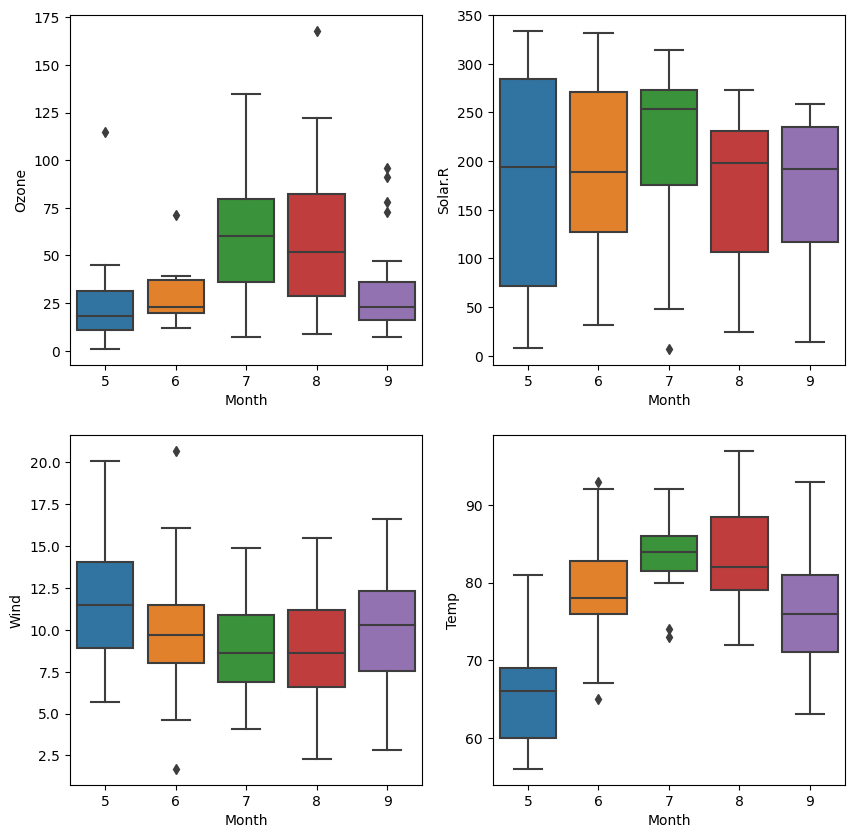

In [93]:
columns = ['Ozone', 'Solar.R', 'Wind', 'Temp']
feature = 'Month'

plt.figure(figsize=(10, 10))
for i in range(len(columns)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[feature], y=data[columns[i]])

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** Как и было сказано выше, выбросы есть в столбце 'Ozone'  и при этом их больше всего. В столбце 'Solar.R' их нет (по предположению из предыдущего ответа). Также есть выбросы в столбцах 'Wind' и 'Temp'. Тут мы рассматриваем boxplot по каждому месяцу, поэтому мы могли не увидеть некоторые выбросы из общей таблицы. На выбросы в температуре не стоит обращать много внимания, так как время идет и погода сама по себе меняется.

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;
- медиану средних Уолша.

Для реализации медианы средних Уолша без циклов обратите внимание на следующие **подсказки**:
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?
2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`.

In [118]:
feature = 'Ozone'

print('Выборочное среднее: ', data[feature].mean().round(3))
print('Выборочная медиана: ', data[feature].median().round(3))
values = (np.array(data[feature]).reshape(-1, 1) + np.array(data[feature])) / 2
print('Медиана средних Уолша: ', pd.Series(values[np.triu_indices_from(values)]).median())

Выборочное среднее:  42.129
Выборочная медиана:  31.5
Медиана средних Уолша:  38.5


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Выборочная медиана существенно меньше выборочного среднего, так как медиана более устойчива к выбросам. Медиана средних Уолша также достаточно неплохо ведет себя при наличии выбросов (в худшем случае теряет 14 % эффективности при рассмотрении распределений с определеннными свойствами). То есть Медиана средних Уолша является чем то средним между выборочной медианой и выборочным средним, так как она менее эффективнее среднего, но при этом лучше него работает с выбросами.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** В данном случае условие независимости скорее всего не выполняется, так как на количество озона в воздухе может влиять и температура, и излучение, и ветер (даже на графике с boxplot можно увидеть зависимость между температурой и количеством озона а воздухе). Также данные  могли сниматься не точно, а с какой-то зависимостью у них.

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете в весеннем семестре, но задуматься и порассуждать полезно уже сейчас.

В реальной жизни условие независимости скорее всего выполняется очень редко, тк для этого необходимо соблюдение 'идеальных' условий, коих в жиздни добиться очень трудно. Можно например построить графики с попарными зависимостями и попробовать поискать зависимость между признаками глазами. Мы производим все расчеты, считая, что данные в выборке независимы, что и нарушается в случае зависимости данных. По определению исследовать зависимость скорее всего не получится, поэтому можно попробовать поискать значение корреляции между разными признаками, когда значение близко к 1 - значит, что скорее всего данные (признаки) зависимы.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.

**Вывод:** Робастные статистики оказываются полезными при наличии выбросов, так как они стараются дать наиболее эффективную оценку, которая способна работать с выбросами. В случае небольшого количетсва признаков визуальный анализ может оказаться довольно эффективным методом, но если признаков будет очень много, то будет сложно находить зависимости между ними визуально. Независимых одинаково распределенных случайных величин в реальном мире почти нет,
тк для этого нужна опять же нужна идеальная ситуация, которых в жизни почти нет.

______________
## Задача 3.
Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

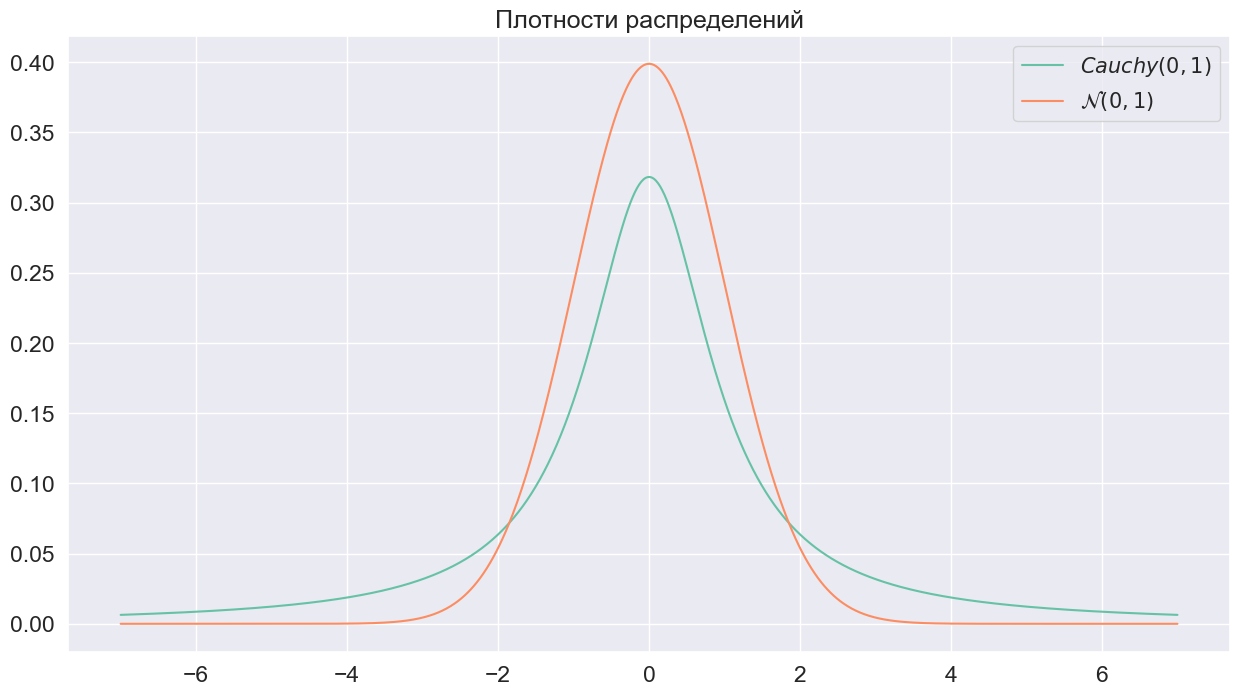

In [20]:
x = np.linspace(-7, 7, 1000)
plt.figure(figsize=(15, 8))
plt.plot(x, sps.cauchy.pdf(x), label='$Cauchy(0,1)$')
plt.plot(x, sps.norm.pdf(x), label='$\mathcal{N}(0,1)$')
plt.grid(':')
plt.legend(fontsize=15)
plt.title('Плотности распределений');

**Вывод:** На графике видно, что распределение Коши (в отличии от нормального) имеет тяжелые хвосты, то есть вероятность выбросов в распределнии Коши намного больше, чем в нормальном распределении.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

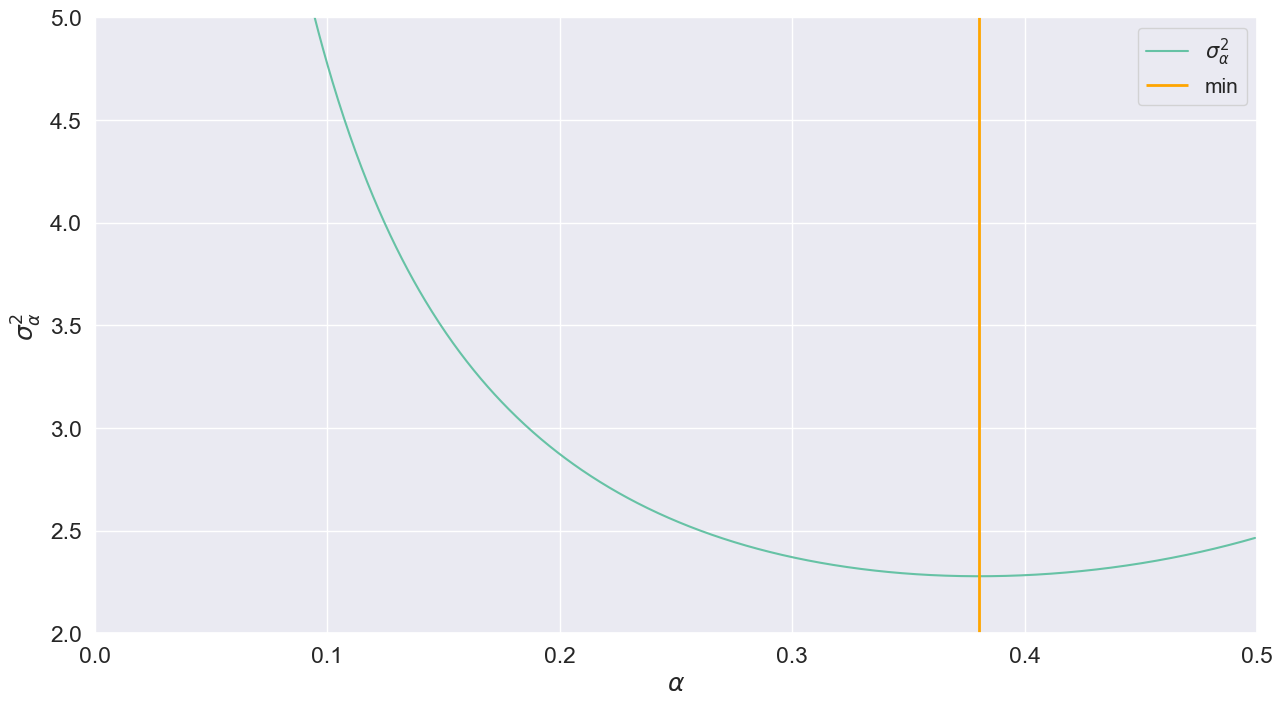

In [21]:
alpha = np.linspace(0.001, 0.5 - 0.001, 1000)
u_a = sps.cauchy.ppf(1 - alpha)
sigma = 2 / (1 - 2 * alpha)**2 * ((1 / scipy.pi) * (u_a - np.arctan(u_a)) + alpha * u_a**2)

plt.figure(figsize=(15, 8))
plt.plot(alpha, sigma, label='$\sigma^2_{\\alpha}$')
plt.grid(':')
plt.ylim(2, 5)
plt.xlim(0, 0.5)
plt.vlines(alpha[np.argmin(sigma)], 2, 5, color='orange', lw=2, label='min')
plt.legend(fontsize=15)
plt.xlabel('$\\alpha$')
plt.ylabel('$\sigma^2_{\\alpha}$');

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

In [27]:
print('alpha = ', alpha[np.argmin(sigma)].round(2))
print('sigma^2 = ', sigma.min().round(2))

alpha =  0.38
sigma^2 =  2.28


**Ответ:** alpha = 0.38, $\sigma^2 = 2.28$

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша;

а также, по каждой из этих оценок, одношаговую оценку. 
В случае выборочной медианы и медианы средних Уолша можно использовать цикл по подвыборкам.

**Напоминание:** если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(\ell''_X(\widehat{\theta}_0) \right)^{-1} \ell'_X(\widehat{\theta}_0)$, где $\ell_X(\theta)$ — логарифмическая функция правдоподобия. Заметим, что обычное выборочное среднее не является асимптотически нормальной оценкой, и оценка, вычисленная по формуле выше, формально не является одношаговой, однако для сравнения ее все равно требуется посчитать.

Постройте интерактивные графики с помощью [Plotly](https://mipt-stats.gitlab.io/courses/ad_fivt/plotly.html). На одном из них изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям. 

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Замечание:** использование `plotly` может сказаться на итоговом размере ноутбука, поэтому, чтобы не возникло проблем при отправке задания, вы можете либо разделить ноутбук на несколько файлов, либо сохранить `html` и отправить графики отдельно, предварительно удалив их из ноутбука.

**Решение:**

In [43]:
n = 1000
sample = sps.cauchy.rvs(size=n)

In [44]:
def sample_mean(sample):
    return np.cumsum(sample) / (np.arange(len(sample)) + 1)

def sample_trim_mean(sample):
    alpha = 0.38
    return np.array(list(map(lambda x: sps.trim_mean(sample[:x], alpha), np.arange(len(sample)) + 1)))

def sample_median(sample):
    return np.array(list(map(lambda x: np.median((sample[:x])), np.arange(len(sample)) + 1)))

def sample_median_W(sample):
    medians = []
    for i in range(1, len(sample) + 1):
        values = (sample[:i].reshape(-1, 1) + sample[:i]) / 2
        medians.append(np.median(values[np.triu_indices_from(values)]))
    return np.array(medians)

In [45]:
def likelihood_step_first(sample, theta):
    sample_new = np.tril(np.tile(sample, (sample.shape[0], 1)))
    theta_new = np.tril(np.tile(theta.reshape(-1, 1), (1, len(theta))))
    value = sample_new - theta_new
    return (2 * value / (1 + value**2)).sum(axis=1)

def likelihood_step_second(sample, theta):
    sample_new = np.tril(np.tile(sample, (sample.shape[0], 1)))
    theta_new = np.tril(np.tile(theta.reshape(-1, 1), (1, len(theta))))
    value = sample_new - theta_new
    return (2 * (value**2 - 1) / (1 + value**2)**2).sum(axis=1)

def one_step(sample, theta):
    return theta - likelihood_step_first(sample, theta) / likelihood_step_second(sample, theta)

In [46]:
def one_step_mean(sample):
    theta_0 = sample_mean(sample)
    return one_step(sample, theta_0)

def one_step_trim_mean(sample):
    theta_0 = sample_trim_mean(sample)
    return one_step(sample, theta_0)

def one_step_median(sample):
    theta_0 = sample_median(sample)
    return one_step(sample, theta_0)

def one_step_median_W(sample):
    theta_0 = sample_median_W(sample)
    return one_step(sample, theta_0)

In [47]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=sample_mean(sample), name='Выборочное среднее',
                         marker=dict(color='#EF553B'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=sample_trim_mean(sample), name='Усеченное среднее',
                         marker=dict(color='#00CC96'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=sample_median(sample), name='Выборочная медиана',
                         marker=dict(color='#FFA15A'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=sample_median_W(sample), name='Медиана средних Уолша',
                         marker=dict(color='#19D3F3'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=one_step_mean(sample), name='Одношаговая оценка выборочного среднего',
                         marker=dict(color='#B6E880'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=one_step_trim_mean(sample), name='Одношаговая оценка усеченного среднего',
                         marker=dict(color='#AB63FA'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=one_step_median(sample), name='Одношаговая оценка выборочной медианы',
                         marker=dict(color='#636EFA'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=one_step_median_W(sample), name='Одношаговая медианы средних Уолша',
                         marker=dict(color='#FF97FF'), line=dict(width=2)))

fig.update_yaxes(range=[-1.5, 2])

fig.update_layout(height=600, width=1000, title_text='График зависимости значений оценок от длины выборки n',
                  title_font_size=15, yaxis_title='Значения оценок', xaxis_title='Длина выборки n')

fig.show()

In [48]:
pof.plot(fig, filename='graph_1.html', auto_open=False)

'graph_1.html'

In [49]:
n = 100
k = 50

sample = sps.cauchy.rvs(size=(k, n))

fig = go.Figure()

for i in range(k):
    showlegend = False
    if i == 0:
        showlegend = True
        
    fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=sample_mean(sample[i]), name='Выборочное среднее',
                             showlegend=showlegend, marker=dict(color='#EF553B'), line=dict(width=2), opacity = 0.4))

    fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=sample_trim_mean(sample[i]), name='Усеченное среднее',
                             showlegend=showlegend, marker=dict(color='#00CC96'), line=dict(width=2), opacity = 0.4))

    fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=sample_median(sample[i]), name='Выборочная медиана',
                             showlegend=showlegend, marker=dict(color='#FFA15A'), line=dict(width=2), opacity = 0.4))

    fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=sample_median_W(sample[i]), name='Медиана средних Уолша',
                             showlegend=showlegend, marker=dict(color='#19D3F3'), line=dict(width=2), opacity = 0.4))

    fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=one_step_mean(sample[i]), name='Одношаговая оценка выборочного среднего',
                             showlegend=showlegend, marker=dict(color='#B6E880'), line=dict(width=2), opacity = 0.4))

    fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=one_step_trim_mean(sample[i]), name='Одношаговая оценка усеченного среднего',
                             showlegend=showlegend, marker=dict(color='#AB63FA'), line=dict(width=2), opacity = 0.4))

    fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=one_step_median(sample[i]), name='Одношаговая оценка выборочной медианы',
                             showlegend=showlegend, marker=dict(color='#636EFA'), line=dict(width=2), opacity = 0.4))

    fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=one_step_median_W(sample[i]), name='Одношаговая медианы средних Уолша',
                             showlegend=showlegend, marker=dict(color='#FF97FF'), line=dict(width=2), opacity = 0.4))
    
fig.update_yaxes(range=[-10, 10])

fig.update_layout(height=600, width=1000, title_text='График зависимости значений оценок от длины выборки b',
                  title_font_size=15, yaxis_title='Значения оценок', xaxis_title='Длина выборки n')

fig.show()

In [50]:
pof.plot(fig, filename='graph_2.html', auto_open=False)

'graph_2.html'

In [51]:
n = 100
k = 50

sample = sps.cauchy.rvs(size=(k, n))

sample_mean_mse = []
sample_trim_mean_mse = []
sample_median_mse = []
sample_median_W_mse = []
sample_step_mean_mse = []
sample_step_trim_mean_mse = []
sample_step_median_mse = []
sample_step_median_W_mse = []

for i in range(k):
    sample_mean_mse.append(sample_mean(sample[i]))
    sample_trim_mean_mse.append(sample_trim_mean(sample[i]))
    sample_median_mse.append(sample_median(sample[i]))
    sample_median_W_mse.append(sample_median_W(sample[i]))
    sample_step_mean_mse.append(one_step_mean(sample[i]))
    sample_step_trim_mean_mse.append(one_step_trim_mean(sample[i]))
    sample_step_median_mse.append(one_step_median(sample[i]))
    sample_step_median_W_mse.append(one_step_median_W(sample[i]))

sample_mean_mse = np.array(sample_mean_mse)
sample_trim_mean_mse = np.array(sample_trim_mean_mse)
sample_median_mse = np.array(sample_median_mse)
sample_median_W_mse = np.array(sample_median_W_mse)
sample_step_mean_mse = np.array(sample_step_mean_mse)
sample_step_trim_mean_mse = np.array(sample_step_trim_mean_mse)
sample_step_median_mse = np.array(sample_step_median_mse)
sample_step_median_W_mse = np.array(sample_step_median_W_mse)

In [52]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=np.mean(sample_mean_mse**2, axis=0),
                         name='Выборочное среднее', marker=dict(color='#EF553B'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=np.mean(sample_trim_mean_mse**2, axis=0),
                         name='Усеченное среднее', marker=dict(color='#00CC96'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=np.mean(sample_median_mse**2, axis=0),
                         name='Выборочная медиана', marker=dict(color='#FFA15A'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=np.mean(sample_median_W_mse**2, axis=0),
                         name='Медиана средних Уолша', marker=dict(color='#19D3F3'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=np.mean(sample_step_mean_mse**2, axis=0),
                         name='Одношаговая оценка выборочного среднего', marker=dict(color='#B6E880'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=np.mean(sample_step_trim_mean_mse**2, axis=0),
                         name='Одношаговая оценка усеченного среднего', marker=dict(color='#AB63FA'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=np.mean(sample_step_median_mse**2, axis=0),
                         name='Одношаговая оценка выборочной медианы', marker=dict(color='#636EFA'), line=dict(width=2)))

fig.add_trace(go.Scatter(x=np.arange(n) + 1, y=np.mean(sample_step_median_W_mse**2, axis=0),
                         name='Одношаговая медианы средних Уолша', marker=dict(color='#FF97FF'), line=dict(width=2)))

fig.update_yaxes(range=[0, 1.5])

fig.update_layout(height=600, width=1000, title_text='График зависимости MSE от длины выборки n',
                  title_font_size=15, yaxis_title='Значения MSE', xaxis_title='Длина выборки n')

fig.show()

In [53]:
pof.plot(fig, filename='graph_3.html', auto_open=False)

'graph_3.html'

**Вывод:** На всех графиках видно, что хуже всего себя ведут оценки выборочного среднего и его одношаговой вариации. Это и логично, так как выборочное среднее очень плохо относится к выбросам в выборке. Они нигде не сходятся к истинному значению параметра. Также среднее не а.н.о параметра, поэтому и не сходится его одношаговая версия. Остальные же оценки на первых двух графиках ведут себя примерно одинаково хорошо и сходятся к истинному значению параметра сдвига. Но все же их одношаговые вариации ведут себя чуть лучше, тк они ближе к ОМП (но на графиках это еле заметно). На последнем же графике с MSE видно (если приблизить), что лучше всего (совсем на чуть чуть) оказалсь оценка усеченным средним и его одношаговый вариант.

__________________
## Задача 4.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев:

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ (см. замечание ниже);
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

*Замечание:*

Первый пример призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.

**Решение:**

In [ ]:
<...>

**Вывод:** <...>

_____________
## Задача 5.
На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенератора сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность:
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k} I \{x \geq 0\},$$
где $\theta = (k, \lambda)$ &mdash; двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится.  В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

За распределение Вейбулла отвечает класс `weibull_min` из модуля `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

**Выборка:** Создайте выборку по значеням среднесуточной скорости ветра на некоторой местности для нескольких лет (не менее трех). Данные дотупны на вики. Можно выбрать любой файл.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

Двумерную сетку можно создать с помощью функции `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, затем сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать трехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [3]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

**Решение:**

In [4]:
data = pd.read_csv('data-weather/9.csv')
data

Year  Month  Day  Mean  Min   Max
0      1966      1    1  10.5  0.0   NaN
1      1966      1    2   4.4  0.0   NaN
2      1966      1    3   2.6  0.0   NaN
3      1966      1    4   1.9  0.0   NaN
4      1966      1    5   2.9  0.0   NaN
...     ...    ...  ...   ...  ...   ...
18471  2016      9   26   1.9  0.0   9.7
18472  2016      9   27   2.2  0.0  11.7
18473  2016      9   28   1.9  0.0  11.7
18474  2016      9   29   1.9  0.0   9.7
18475  2016      9   30   1.9  0.0   9.7

[18476 rows x 6 columns]

In [5]:
data = data[data['Year'] >= 2012]
#data['Wind'] = (data['Min'] + data['Max']) / 2

In [6]:
def log_likelihood(sample, theta):
    params = np.dstack((theta[0], theta[1])).reshape(-1, 2)
    return np.sum((sps.weibull_min(c=params[:, 0].reshape(-1, 1), scale=params[:, 1].reshape(-1, 1)).logpdf(sample)), axis=1)

In [7]:
grid = np.mgrid[1:10:0.1, 1:10:0.1]
sample = np.array(data['Mean'].dropna())
grid_log_likelihood = log_likelihood(sample, (grid[0], grid[1]))

In [8]:
params = np.dstack((grid[0], grid[1])).reshape(-1, 2)
max_param = cool_argmax(grid_log_likelihood)
params[max_param]

array([3.8, 2.8])

In [9]:
grid = np.mgrid[2.5:5:0.01, 2:3.5:0.01]
grid_log_likelihood = log_likelihood(sample, (grid[0], grid[1]))

In [10]:
params = np.dstack((grid[0], grid[1])).reshape(-1, 2)
max_param = cool_argmax(grid_log_likelihood)
params[max_param]

array([3.79, 2.83])

In [11]:
grid = np.mgrid[3.7:3.9:0.001, 2.8:2.9:0.001]
grid_log_likelihood = log_likelihood(sample, (grid[0], grid[1]))
params = np.dstack((grid[0], grid[1])).reshape(-1, 2)
max_param = cool_argmax(grid_log_likelihood)
params[max_param]

array([3.796, 2.833])

In [12]:
grid = np.mgrid[3.79:3.82:0.0001, 2.82:2.84:0.0001]
grid_log_likelihood = log_likelihood(sample, (grid[0], grid[1]))
params = np.dstack((grid[0], grid[1])).reshape(-1, 2)
max_param = cool_argmax(grid_log_likelihood)
params[max_param]

array([3.7954, 2.8326])

In [13]:
grid = np.mgrid[3.795:3.796:0.00001, 2.832:2.835:0.00001]
grid_log_likelihood = log_likelihood(sample, (grid[0], grid[1]))
params = np.dstack((grid[0], grid[1])).reshape(-1, 2)
max_param = cool_argmax(grid_log_likelihood)
params[max_param]

array([3.79536, 2.83261])

In [14]:
best_k = params[max_param][0]
best_lambda = params[max_param][1]

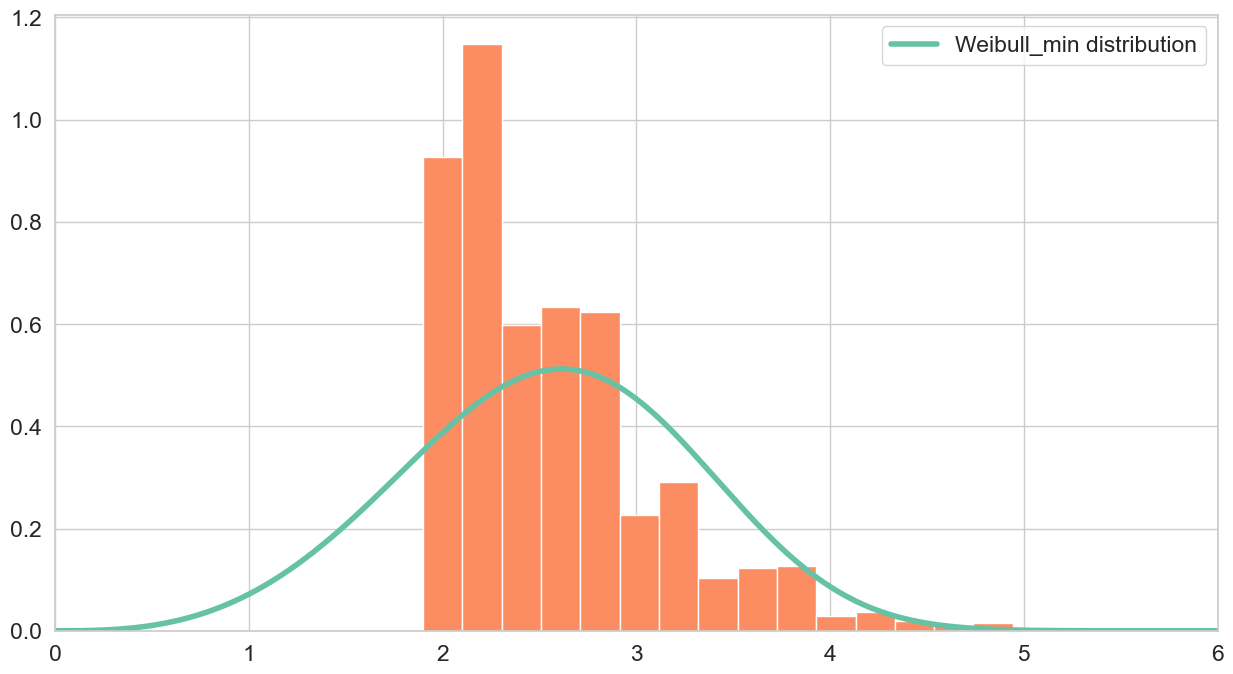

In [18]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
grid_x = np.linspace(0, 6, 10000)
dens = sps.weibull_min.pdf(grid_x, c=best_k, scale=best_lambda)
plt.plot(grid_x, dens, lw=4, label = 'Weibull_min distribution')
plt.hist(sample, density=True, bins = 35)
plt.xlim(0, 6)
plt.legend();

*b).* Обозначим $\widehat{\theta} = \left(\widehat{\lambda}, \widehat{k}\right)$ &mdash; ОМП. Запишите уравнение правдоподобия, приравняв все частные производные в точке экстремума логарифмической функции правдоподобия к $0$. Используя одно из равенств, можно выразить $\widehat{\lambda}$ через значения $X_1, \dots, X_n, \widehat{k}$; подставив это выражение в другое равенство, получить уравнение на $\widehat{k}$. Решите это уравнение приближенно с помощью метода Ньютона и получите $\widehat{k}$, а значит, и $\widehat{\lambda}$.

**Решение:**

In [ ]:
<...>

**Вывод:** <...>